<a href="https://colab.research.google.com/github/oviedof1/Machine-Learning/blob/master/Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program uses the dual moving average crossover to determine when to buy and sell stock

In [0]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
#load the data
from google.colab import files
uploaded = files.upload ()

Saving AAPL.csv to AAPL.csv


In [22]:
#store data
AAPL = pd.read_csv('AAPL.csv')
#show data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,9.258014,178159800
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,9.161551,197677200
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,9.322326,207270700
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,9.254304,170970800
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,9.178867,116739700
...,...,...,...,...,...,...,...
1317,2011-12-22,56.714287,57.018570,56.585712,56.935715,49.289097,50589700
1318,2011-12-23,57.098572,57.655716,57.070000,57.618572,49.880241,67349800
1319,2011-12-27,57.585712,58.441429,57.574287,58.075714,50.275993,66269000
1320,2011-12-28,58.127144,58.321430,57.334286,57.520000,49.794914,57165500


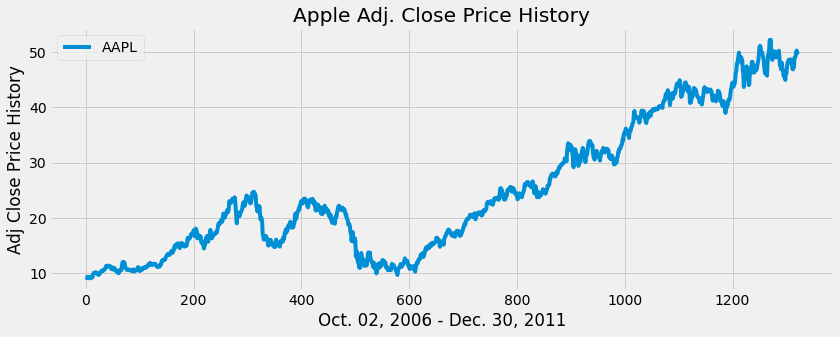

In [23]:
#visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label ='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj Close Price History')
plt.legend(loc='upper left')
plt.show()

In [24]:
#create simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,47.454936
1318,47.529592
1319,47.619913
1320,47.716294


In [26]:
#create simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,47.952352
1318,47.965659
1319,48.001722
1320,48.037611


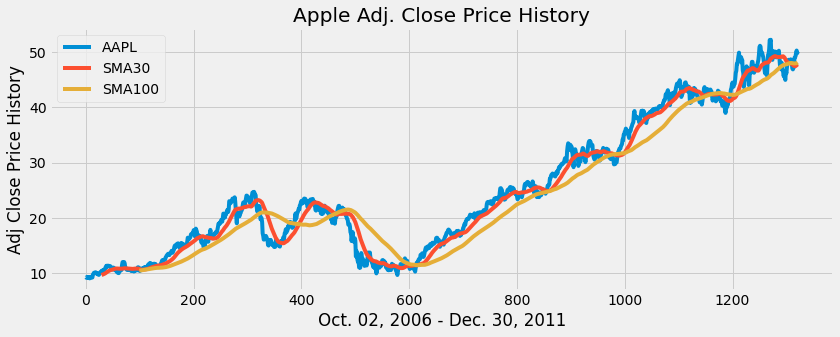

In [27]:
#visualize data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label ='AAPL')
plt.title('Apple Adj. Close Price History')
plt.plot(SMA30['Adj Close Price'], label = 'SMA30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA100')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj Close Price History')
plt.legend(loc='upper left')
plt.show()

In [29]:
#Create a new dataframe to store all data
data = pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close Price']
data['SMA100']=SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,9.258014,NaN,NaN
1,9.161551,NaN,NaN
2,9.322326,NaN,NaN
3,9.254304,NaN,NaN
4,9.178867,NaN,NaN
...,...,...,...
1317,49.289097,47.454936,47.952352
1318,49.880241,47.529592,47.965659
1319,50.275993,47.619913,48.001722
1320,49.794914,47.716294,48.037611


In [0]:
#create function to signal when to buy and sell the stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [0]:
#store the buy and sell data into variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [53]:
#show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,9.258014,NaN,NaN,NaN,NaN
1,9.161551,NaN,NaN,NaN,NaN
2,9.322326,NaN,NaN,NaN,NaN
3,9.254304,NaN,NaN,NaN,NaN
4,9.178867,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1317,49.289097,47.454936,47.952352,NaN,NaN
1318,49.880241,47.529592,47.965659,NaN,NaN
1319,50.275993,47.619913,48.001722,NaN,NaN
1320,49.794914,47.716294,48.037611,NaN,NaN


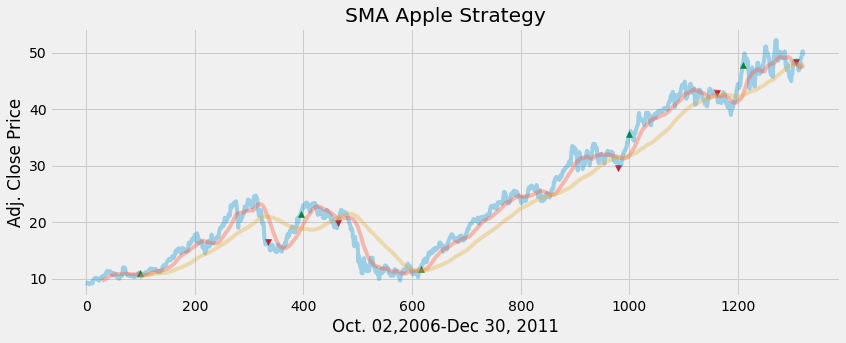

In [54]:
#visualize data and strategy to buy and sell stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'],label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'],label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'],label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color = 'red')
plt.title('SMA Apple Strategy')
plt.xlabel('Oct. 02,2006-Dec 30, 2011')
plt.ylabel('Adj. Close Price')
plt.show()